In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as tts

In [4]:
df=pd.read_excel('new Churn.xlsx')

In [5]:
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [6]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

In [7]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [9]:
1390/(3892+1390)

0.2631578947368421

<Axes: xlabel='Churn', ylabel='count'>

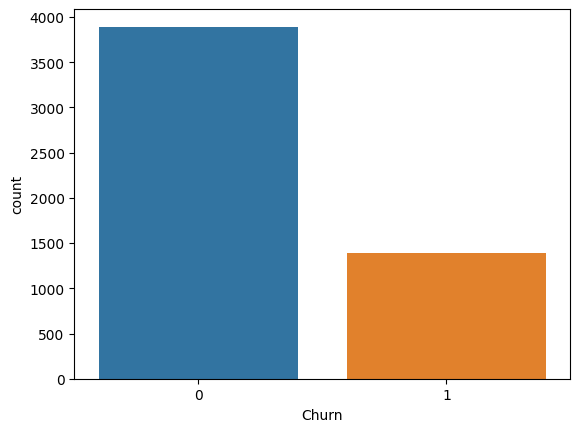

In [10]:
sns.countplot(df,x='Churn')

In [11]:
df.shape

(5282, 21)

In [12]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


<Axes: >

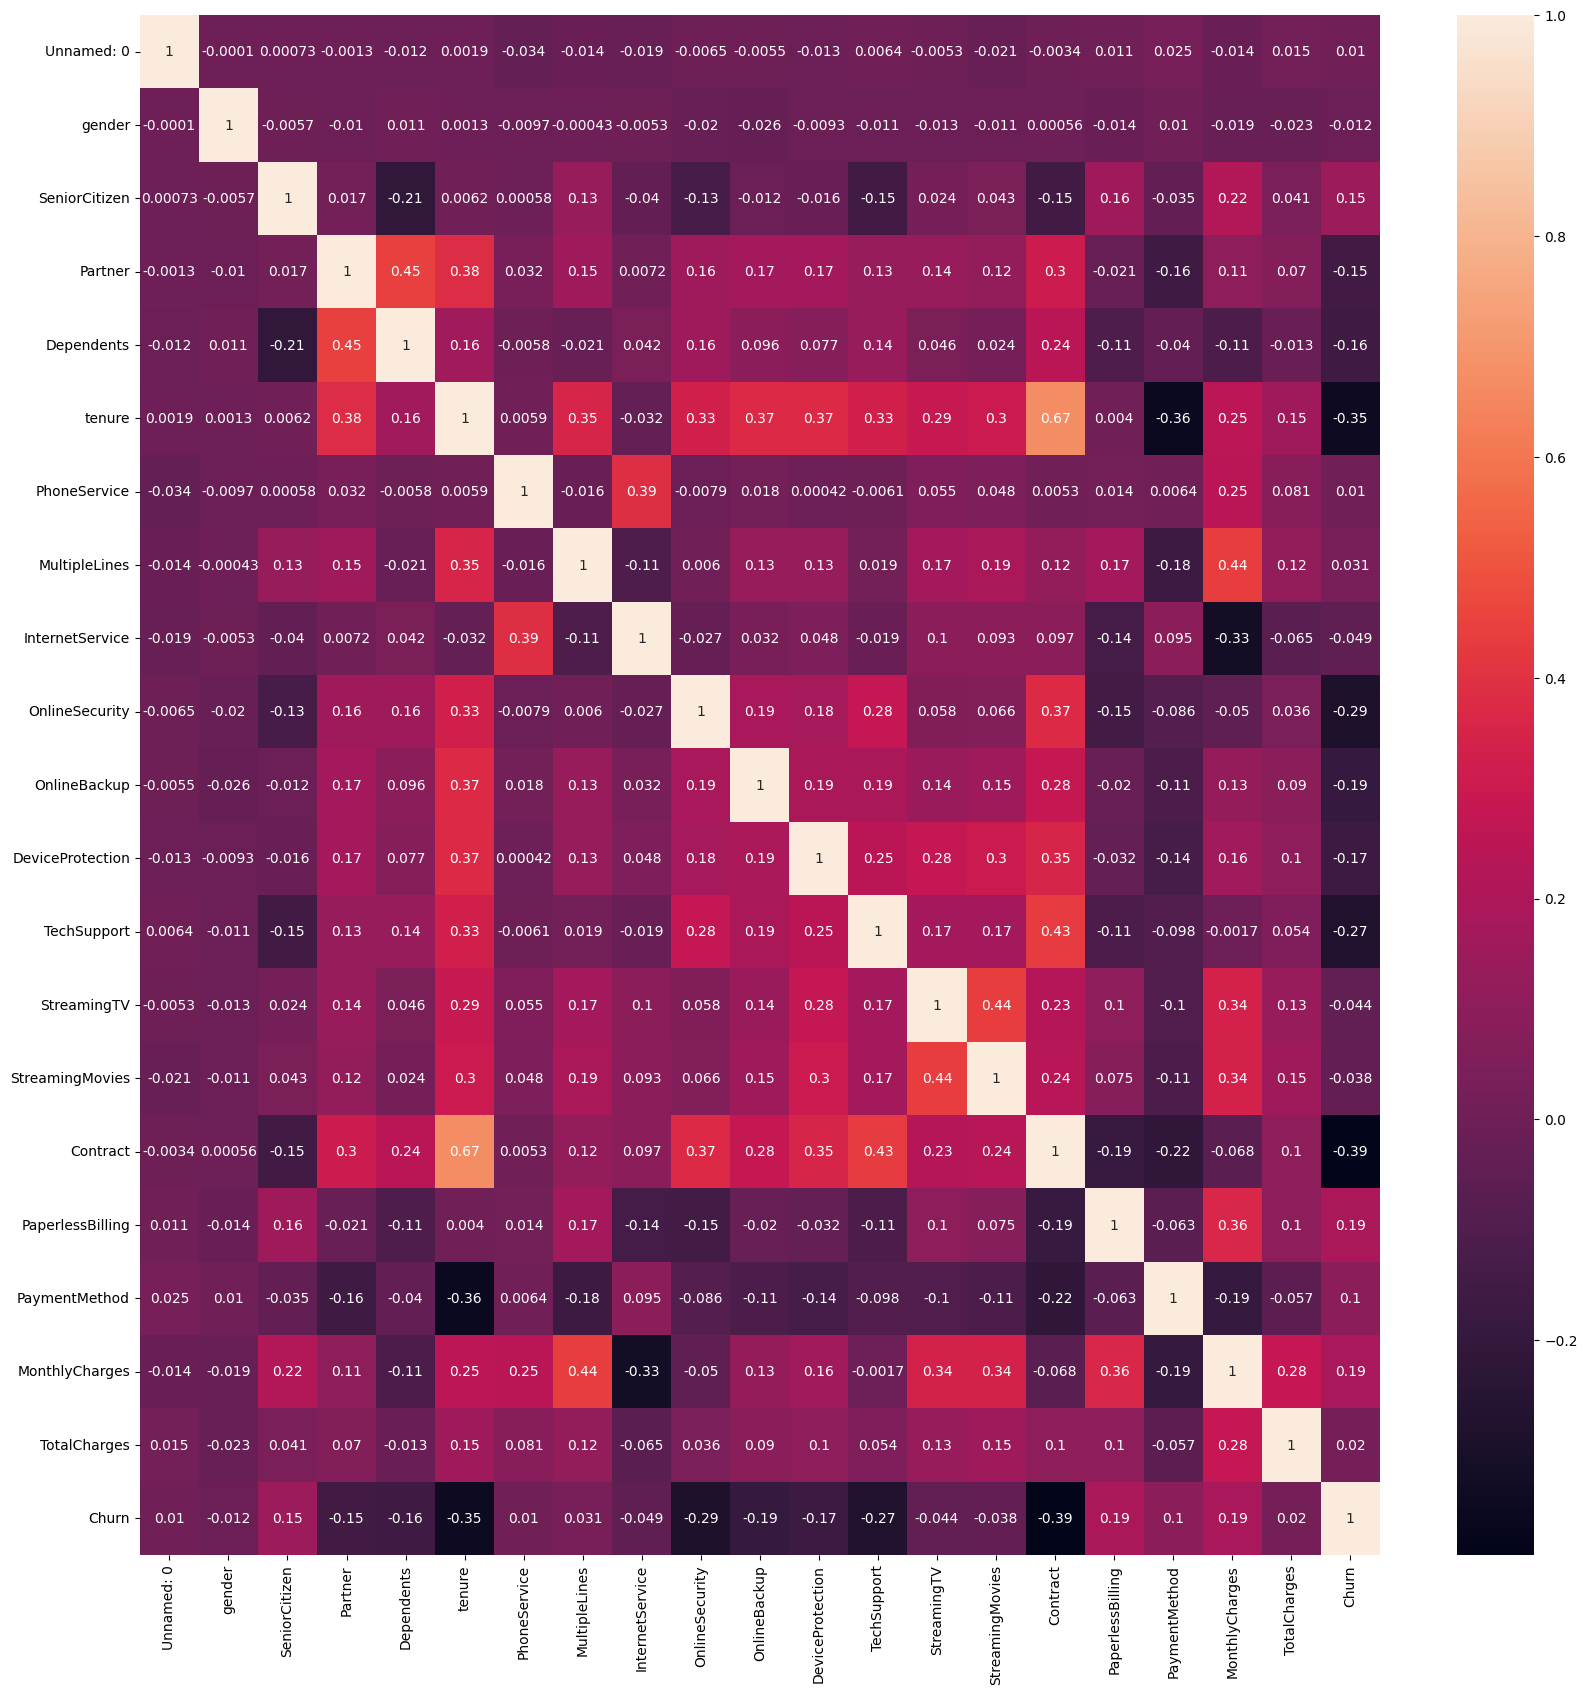

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='gender', ylabel='count'>

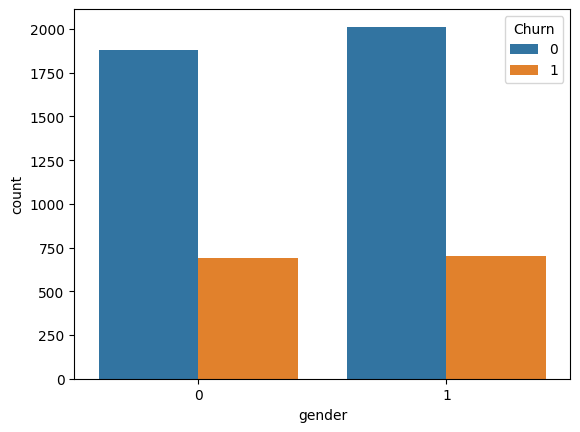

In [14]:
sns.countplot(x='gender',hue='Churn',data=df)

In [15]:
df['PhoneService'].value_counts()

PhoneService
1    4773
0     509
Name: count, dtype: int64

In [18]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
df.shape

(5282, 20)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
x=df.drop('Churn',axis=1)

In [22]:
y=df[['Churn']]

In [23]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [24]:
y.head()

,Churn
0,1
1,0
2,0
3,0
4,1


In [25]:
x.shape

(5282, 19)

In [26]:
df.Churn.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64